In [2]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math
from matplotlib import cm
from matplotlib.cm import ScalarMappable
import matplotlib.animation as animation

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

df = df.transpose()

data = {'Mean' : [df.iloc[:,0].mean(),
                     df.iloc[:,1].mean(),
                     df.iloc[:,2].mean(),
                     df.iloc[:,3].mean()],
       'Std error' : [df.iloc[:,0].std()/math.sqrt(len(df.iloc[:,0])),
                     df.iloc[:,1].std()/math.sqrt(len(df.iloc[:,1])),
                     df.iloc[:,2].std()/math.sqrt(len(df.iloc[:,2])),
                     df.iloc[:,3].std()/math.sqrt(len(df.iloc[:,3]))] }



data = pd.DataFrame(data, index = [1992,1993,1994,1995])

data

,Mean,Std error
1992,33312.107476,3320.866311
1993,41861.859541,1628.701180
1994,39493.304941,2323.419534
1995,47743.550969,1155.026400


In [5]:
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import numpy as np; np.random.seed(42)

N = 120
x = np.random.rand(N)
y = np.abs(np.random.normal(size=N))*1000
mean= np.mean(y)

fig, ax=plt.subplots()
ax.plot(x,y, ls="", marker="o", markersize=2)
ax.axhline(y=mean, color="red")

trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0,mean, "{:.0f}".format(mean), color="red", transform=trans, 
        ha="right", va="center")

plt.show()

<IPython.core.display.Javascript object>


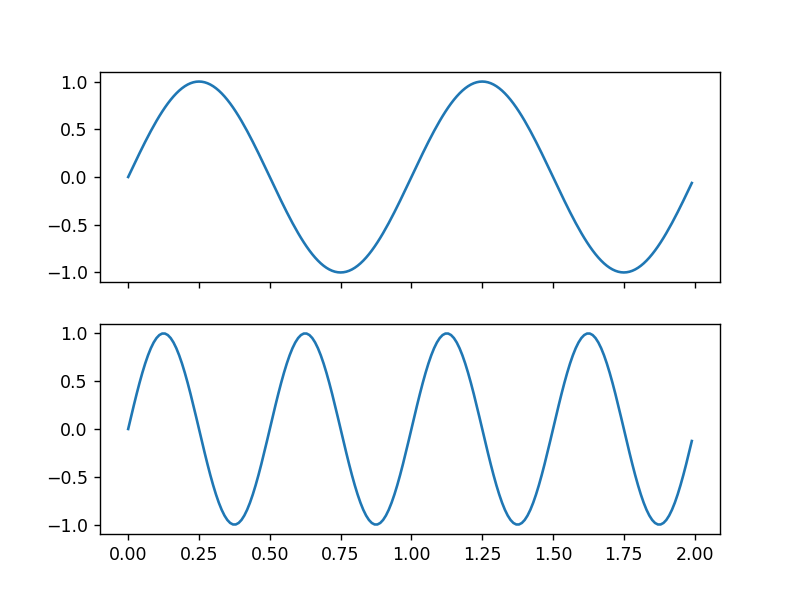

In [9]:
from matplotlib.widgets import MultiCursor
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
t = np.arange(0.0, 2.0, 0.01)
ax1.plot(t, np.sin(2*np.pi*t))
ax2.plot(t, np.sin(4*np.pi*t))

multi = MultiCursor(fig.canvas, (ax1, ax2), color='r', lw=1,
                    horizOn=False, vertOn=True)
plt.show()

<IPython.core.display.Javascript object>


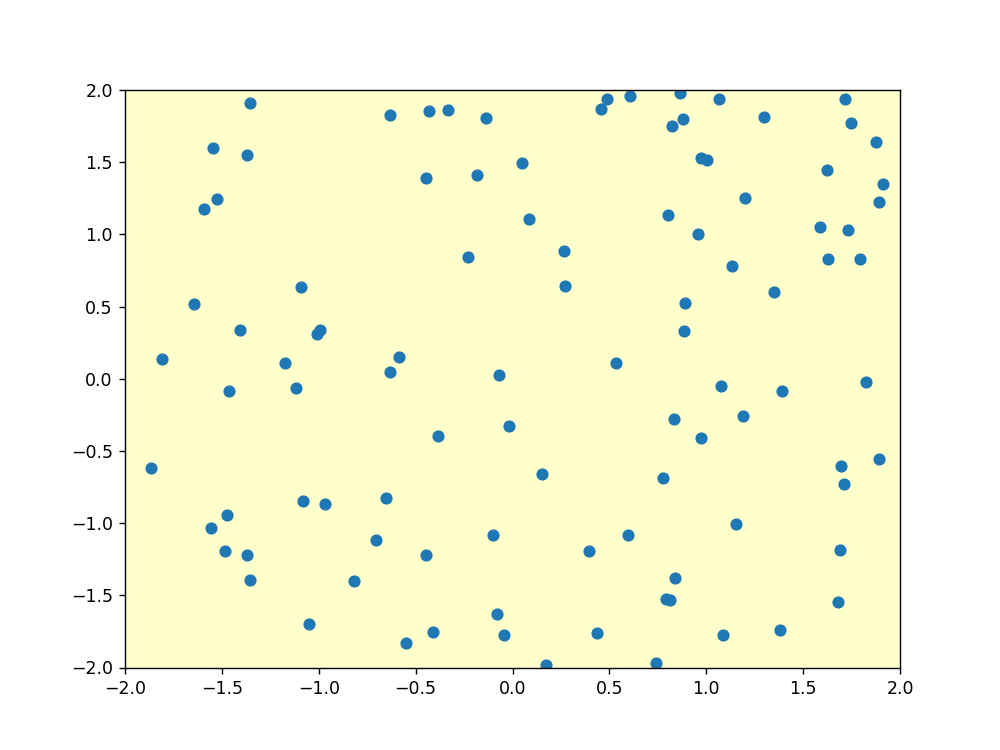

In [29]:
from matplotlib.widgets import Cursor
import numpy as np
import matplotlib.pyplot as plt


# Fixing random state for reproducibility
np.random.seed(19680801)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, facecolor='#FFFFCC')

x, y = 4*(np.random.rand(2, 100) - .5)
ax.plot(x, y, 'o')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

# Set useblit=True on most backends for enhanced performance.
cursor = Cursor(ax, useblit=True, color='red', linewidth=2)

plt.show()

<IPython.core.display.Javascript object>


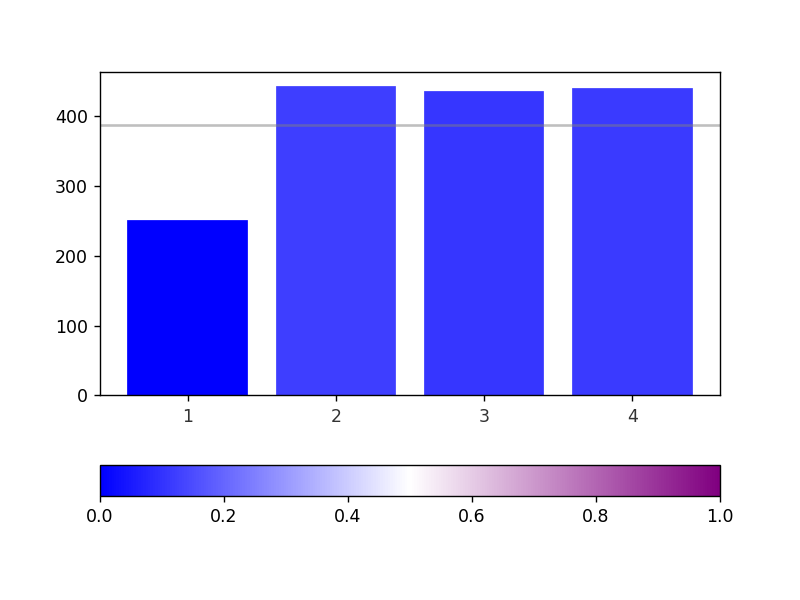

In [10]:
import pandas as pd
import numpy as np
import matplotlib.colors as mcol
import matplotlib.cm as cm
import matplotlib.pyplot as plt

np.random.seed(12345)
df = pd.DataFrame([np.random.normal(335,1500,300), 
                   np.random.normal(410,900,300), 
                   np.random.normal(410,1200,300), 
                   np.random.normal(480,550,300)], 
                  index=[1,2,3,4])

fig, ax = plt.subplots()

threshold=420.
bars = plt.bar(range(df.shape[0]), df.mean(axis = 1), color = 'lightslategrey')
axline = plt.axhline(y = threshold, color = 'grey', alpha = 0.5)

cm1 = mcol.LinearSegmentedColormap.from_list("Test",["b", "white", "purple"])
cpick = cm.ScalarMappable(cmap=cm1) 
cpick.set_array([])
plt.colorbar(cpick, orientation='horizontal')

def percentages(threshold):
    percentages = []
    for bar in bars:
        percentage = (bar.get_height()-threshold)/bar.get_height()
        if percentage>1: percentage = 1
        if percentage<0: percentage=0
        percentages.append(percentage)
    return percentages

def update(threshold):
    axline.set_ydata(threshold)
    perc = percentages(threshold)
    for bar, p in zip(bars, perc):
        bar.set_color(cpick.to_rgba(p))

# update once before showing
update(threshold)

def onMouseMove(event):
    if event.inaxes == ax:
        update(event.ydata)
        fig.canvas.draw_idle()

fig.canvas.mpl_connect('motion_notify_event', onMouseMove)

plt.xticks(range(df.shape[0]), df.index, alpha = 0.8)

plt.show()

<IPython.core.display.Javascript object>


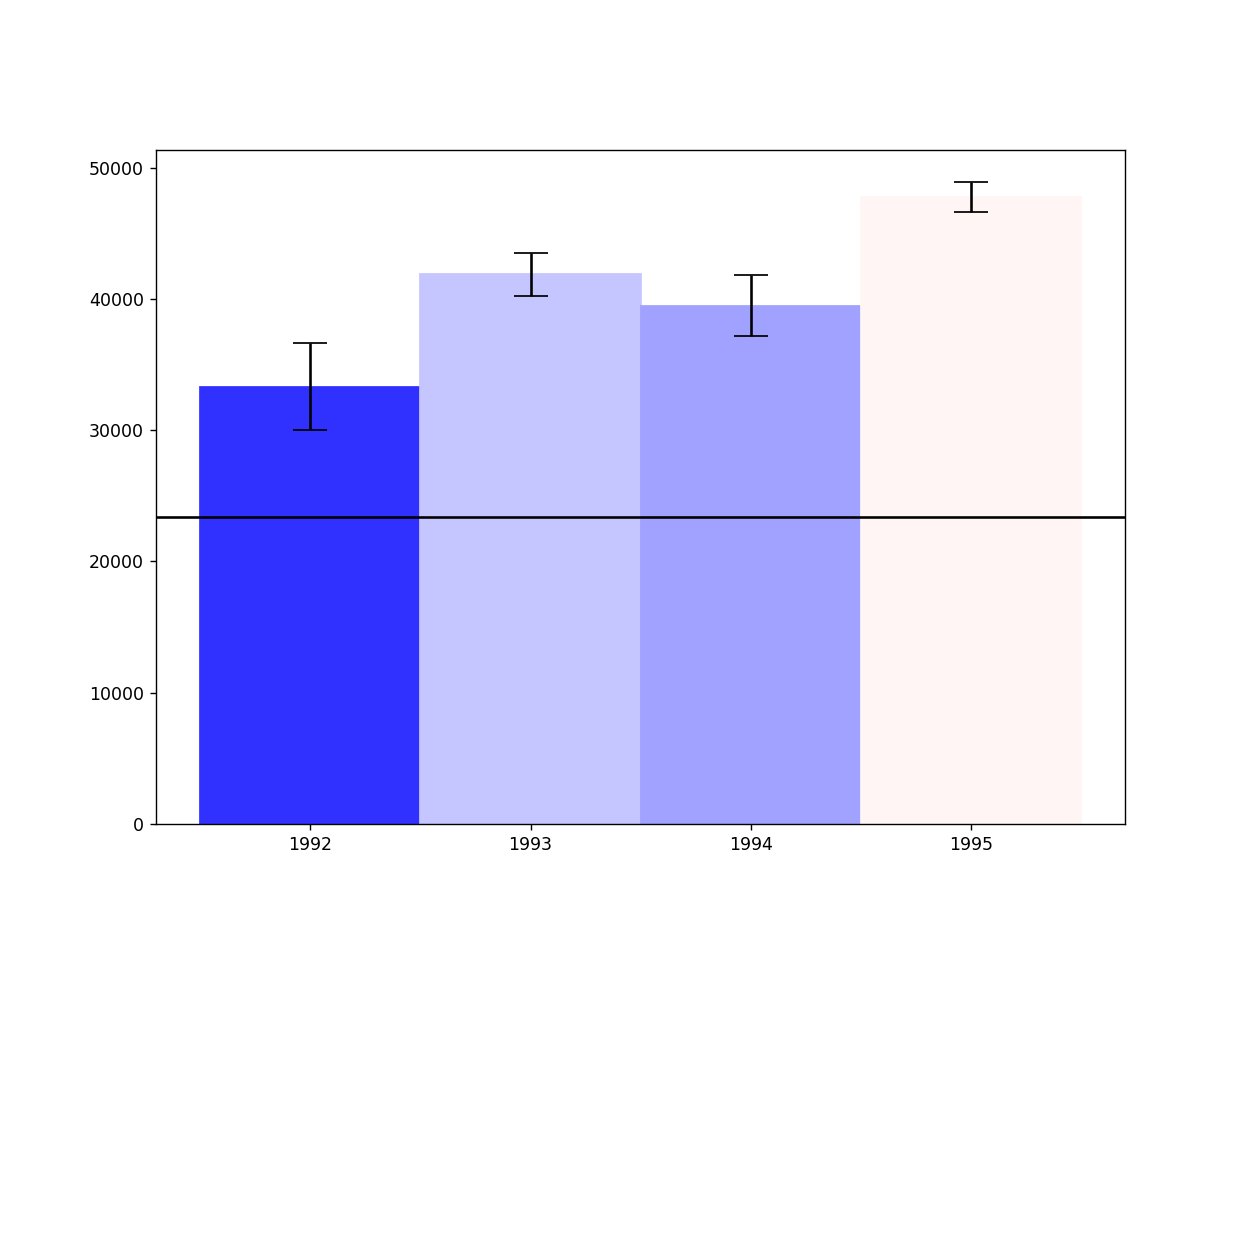

40000


In [12]:
import pandas as pd
import numpy as np
import matplotlib.colors as mcol
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

fig, ax = plt.subplots(figsize = (10,10))

threshold=input()

df_p = pd.DataFrame()
df_p['diff'] = data['Mean'].apply(lambda x: float(threshold)-x)

    
cmap = plt.cm.get_cmap('seismic')
colour = [cmap(x) for x in df_p['diff']]

bars = plt.bar(data.index,data['Mean'], yerr = data['Std error'],capsize=10, edgecolor='black', color = colour, width =1.0, tick_label = data.index, picker = True)

axline = plt.axhline(y = float(threshold), color = 'black')
trans = transforms.blended_transform_factory(plt.gca().get_yticklabels()[0].get_transform(), plt.gca().transData)
label = plt.text(0,threshold, "{}".format(threshold), color="black", transform=trans, ha="right", va="center",bbox=dict(facecolor="w", edgecolor ='black'))

cm1 = plt.cm.get_cmap('seismic')
cpick = cm.ScalarMappable(cmap=cm1,norm=plt.Normalize(0,1)) 
cpick.set_array([])
plt.colorbar(cpick, orientation='horizontal')
cbar.set_label('Color', rotation=270,labelpad=25)

def percentages(threshold):
    percentages = []
    for bar in bars:
        percentage = (bar.get_height()-float(threshold))/bar.get_height()

        if percentage>1: percentage = 1
        if percentage<0: percentage=0
        percentages.append(percentage)
    return percentages

def update(threshold):
    axline.set_ydata(threshold)
    perc = percentages(threshold)
    for bar, p in zip(bars, perc):
        bar.set_color(cpick.to_rgba(p))

# update once before showing
update(threshold)


def onMouseMove(event):
    if event.inaxes == ax:
        update(event.ydata)
        fig.canvas.draw_idle()

fig.canvas.mpl_connect('motion_notify_event', onMouseMove)



plt.show()

In [ ]:
y = input('enter a y value:')

plt.figure(figsize = (8,8))
    
df_p = pd.DataFrame()
df_p['diff'] = data['Mean'].apply(lambda x: float(y)-x)
df_p['sign'] = df_p['diff'].abs()/df_p['diff']
old_range = abs(df_p['diff']).min(),df_p['diff'].abs().max()
new_range = 0.5,1
df_p['shade'] = df_p['sign']*np.interp(df_p['diff'].abs(),old_range,new_range)
    
cmap = plt.cm.get_cmap('seismic_r')
colour = [cmap(x) for x in df_p['shade']]
    
barplot = plt.bar(data.index,data['Mean'], yerr = data['Std error'],capsize=10, edgecolor='black', color = colour, width =1.0, tick_label = data.index, picker = True)
    
sm = ScalarMappable(cmap=cmap, norm=plt.Normalize(0,1))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Color', rotation=270,labelpad=25)
    
plt.axhline(y=float(y))
plt.annotate('y = {}'.format(y),[1991.5,50000])


plt.show()

enter a y value:40000


<IPython.core.display.Javascript object>


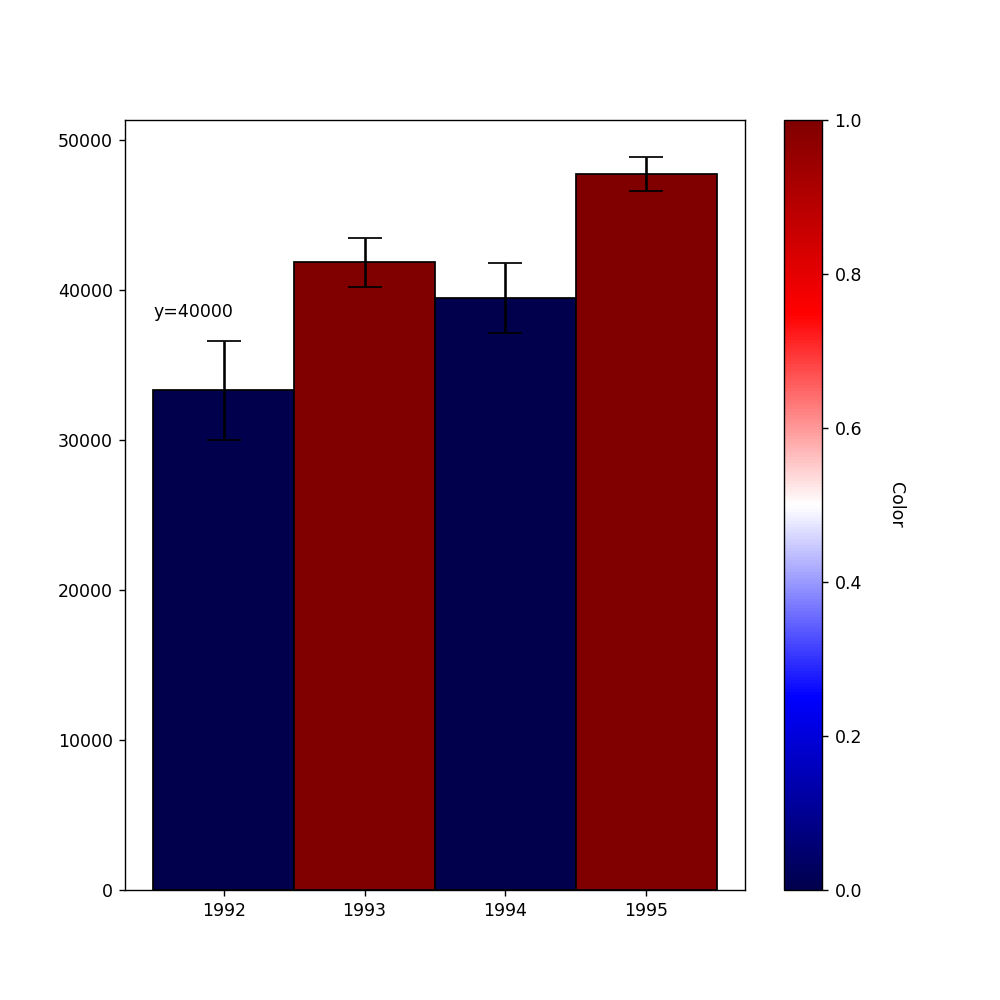

In [14]:
y = input('enter a y value:')

plt.figure(figsize = (8,8))
    
df_p = pd.DataFrame()
df_p['diff'] = data['Mean'].apply(lambda x: x-float(y))

    
cmap = plt.cm.get_cmap('seismic')

colour = [cmap(x) for x in df_p['diff']]
    
ax = plt.bar(data.index,data['Mean'], yerr = data['Std error'],capsize=10, edgecolor='black', color = colour, width =1.0, tick_label = data.index, picker = True)
    
sm = ScalarMappable(cmap=cmap, norm=plt.Normalize(0,1))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Color', rotation=270,labelpad=25)
    
line = plt.axhline(y=float(y), color ='black')

label = plt.gca().text(1991.5, float(y)-1800, 'y='+str(int(y)))

def onclick(event):
    line.set_data([0,1],[event.ydata]*2)
    
    text.set_text('y='+str(int(event.ydata)))
    text.set_position(1991.5,event.ydata - 1800)
    
    
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

plt.show()

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import math
import matplotlib.gridspec as gridspec
from matplotlib import cm
from matplotlib.cm import ScalarMappable


np.random.seed(12345)
df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

###Calculate statistics incl confidence interval for the mean.  Calculate 97.5% interquantile range of the normal distribution (being 1.96 x standard error)
df =  df.T
stats = df.describe(percentiles = [0.025, 0.25, 0.5, 0.75, 0.975])
mean = stats.loc['mean']
onesd_meanerror = df.sem(axis = 0)
error_low = onesd_meanerror*1.96
error_high = onesd_meanerror*1.96



ydataselect = 40000

class PointPicker(object):
    
    def __init__(self, ax, clicklim=5):
        self.fig=ax.figure
        self.ax = ax
        self.clicklim = clicklim
        self.horizontal_line = ax.axhline(y=.5, color='black')
        self.text = ax.text(0,0.5, "")
        print (self.horizontal_line)
        self.fig.canvas.mpl_connect('button_press_event', self.onclick1)


    def onclick1(self, event):
        if event.inaxes == self.ax:
            x = event.xdata
            y = event.ydata
            xlim0, xlim1 = ax.get_xlim()
            if x <= xlim0+(xlim1-xlim0)*self.clicklim:
                self.horizontal_line.set_ydata(y)
                self.text.set_text(str(int(y)))
                self.text.set_position((xlim0, y))
                self.ax.set_title('Mean sale values by year compared to a given value y = {}'.format(str(int(y))), fontsize = 10)
                self.fig.canvas.draw()
                
                
    
if __name__ == '__main__':
    fig = plt.figure()
    ax = fig.add_subplot(111)
    x_axis_label = df.columns.values
    plt.xticks(x_axis_label)
    bars = (ax.bar(x_axis_label, mean, width=1, align='center',yerr = (error_low, error_high), error_kw={'capsize': 10, 'elinewidth': 2}))
    for i, v in enumerate(mean):
        ax.text(x_axis_label[i], 2500, str(int(v)), ha='center',color='black', fontweight='bold')
    my_cmap = plt.cm.get_cmap('seismic_r')
    sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,1))
    sm.set_array([])
    cbar = plt.colorbar(sm)
    cbar.set_label('Colorbar', rotation=270,labelpad=25)

class ClickChart(object):

    def __init__(self, ax):
        self.fig=ax.figure
        self.ax = ax
        self.fig.canvas.mpl_connect('button_press_event', self.onclick2)


    def onclick2(self, event):
        self.ypress = event.ydata
        self.color_bar(event)

    def color_bar(self, event):
        for index, bar in enumerate(bars):
            bar.set_color(c=my_cmap(self.calc_prob(index)))
            print(index)

    def calc_prob(self, index):
        global mean, onesd_meanerror
        mean2 = mean.iloc[index] 
        err = onesd_meanerror.iloc[index]
        result = norm.cdf(self.ypress, loc=mean2, scale=err) 
        return result


click = ClickChart(ax)
p = PointPicker(ax)
plt.show()

In [ ]:
y = 43000

df_p = pd.DataFrame()
df_p['diff'] = data['Mean'].apply(lambda x: float(y)-x)
df_p['sign'] = df_p['diff'].abs()/df_p['diff']
old_range = abs(df_p['diff']).min(),df_p['diff'].abs().max()
new_range = 0.5,1
df_p['shade'] = df_p['sign']*np.interp(df_p['diff'].abs(),old_range,new_range)


def color(y, mean, ci):
    if y <= (mean-ci):
        return 'darkred'
    elif (mean-ci) < y and y < mean:
        return 'red'
    elif y==mean:
        return 'white'
    elif mean< y and y < (mean+ci):
        return 'blue'
    else:
        return 'darkblue'
    
xpos = 1991.5
ypadding = 2000
obl = ax.axhline(y=y,c='0.7')
obt = ax.text(xpos,y-ypadding,str(y))
def onclick(event,text,line,xp,yp):
    text.set_text(str(int(event.ydata)))
    text.set_position(xp,event.ydata-yp)
    line.set_data([0,1],[event.ydata]*2)
    for i,bar in enumerate(bars):
        bar.set_facecolor(color(event.ydata,bar.get_height(), ci.iloc[i]))
fig.canvas.mpl_connect('button_press_event', lambda x: onclick(x,obt,obl,xpos,ypadding) )